In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

In [36]:
telco_churn = pd.read_csv('/home/amybirdee/hobby_projects/telco_customer_churn/Telco_Customer_Churn.csv', delimiter = ',')

In [37]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
#total charges is an object datatype but should be float - converting to float, errors = 'coerce' changes non-numeric values
#to NaN
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'], errors = 'coerce')

In [40]:
#removing any NaNs from total charges column
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].replace(np.nan, 0)

In [41]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
#don't need the customer id for the model so dropping this
telco_churn = telco_churn.drop('customerID', axis = 1)
telco_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
#target variable is churn - currently this column shows yes/no but it needs to be a binary column to changing to 0/1
telco_churn['Churn'] = telco_churn['Churn'].replace({'Yes': 1, 'No': 0})
telco_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [44]:
#counting how many 0s and 1s we have in churn column - 5174 customers didn't churn and 1869 did
print(telco_churn.Churn.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


In [45]:
#creating dummy values for all categorical variables to use in model
telco_dummy = pd.get_dummies(telco_churn)
telco_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [46]:
telco_dummy.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

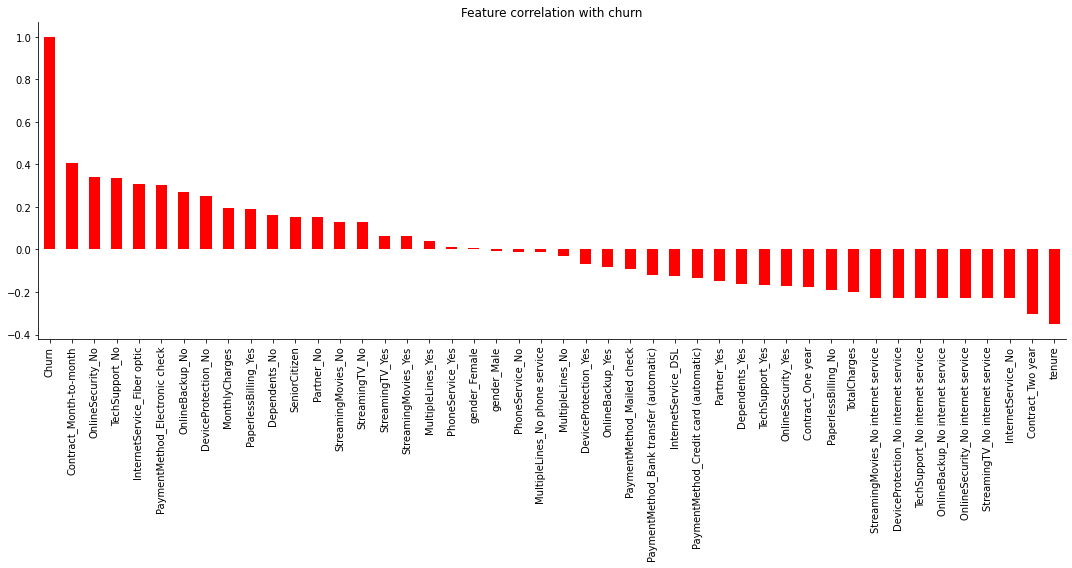

In [47]:
#plot correlations between target feature (churn) and all other variables
fig = plt.figure(figsize = (15,8))
ax = plt.subplot()
telco_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', color = 'red')
plt.title('Feature correlation with churn', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('churn_correlation')

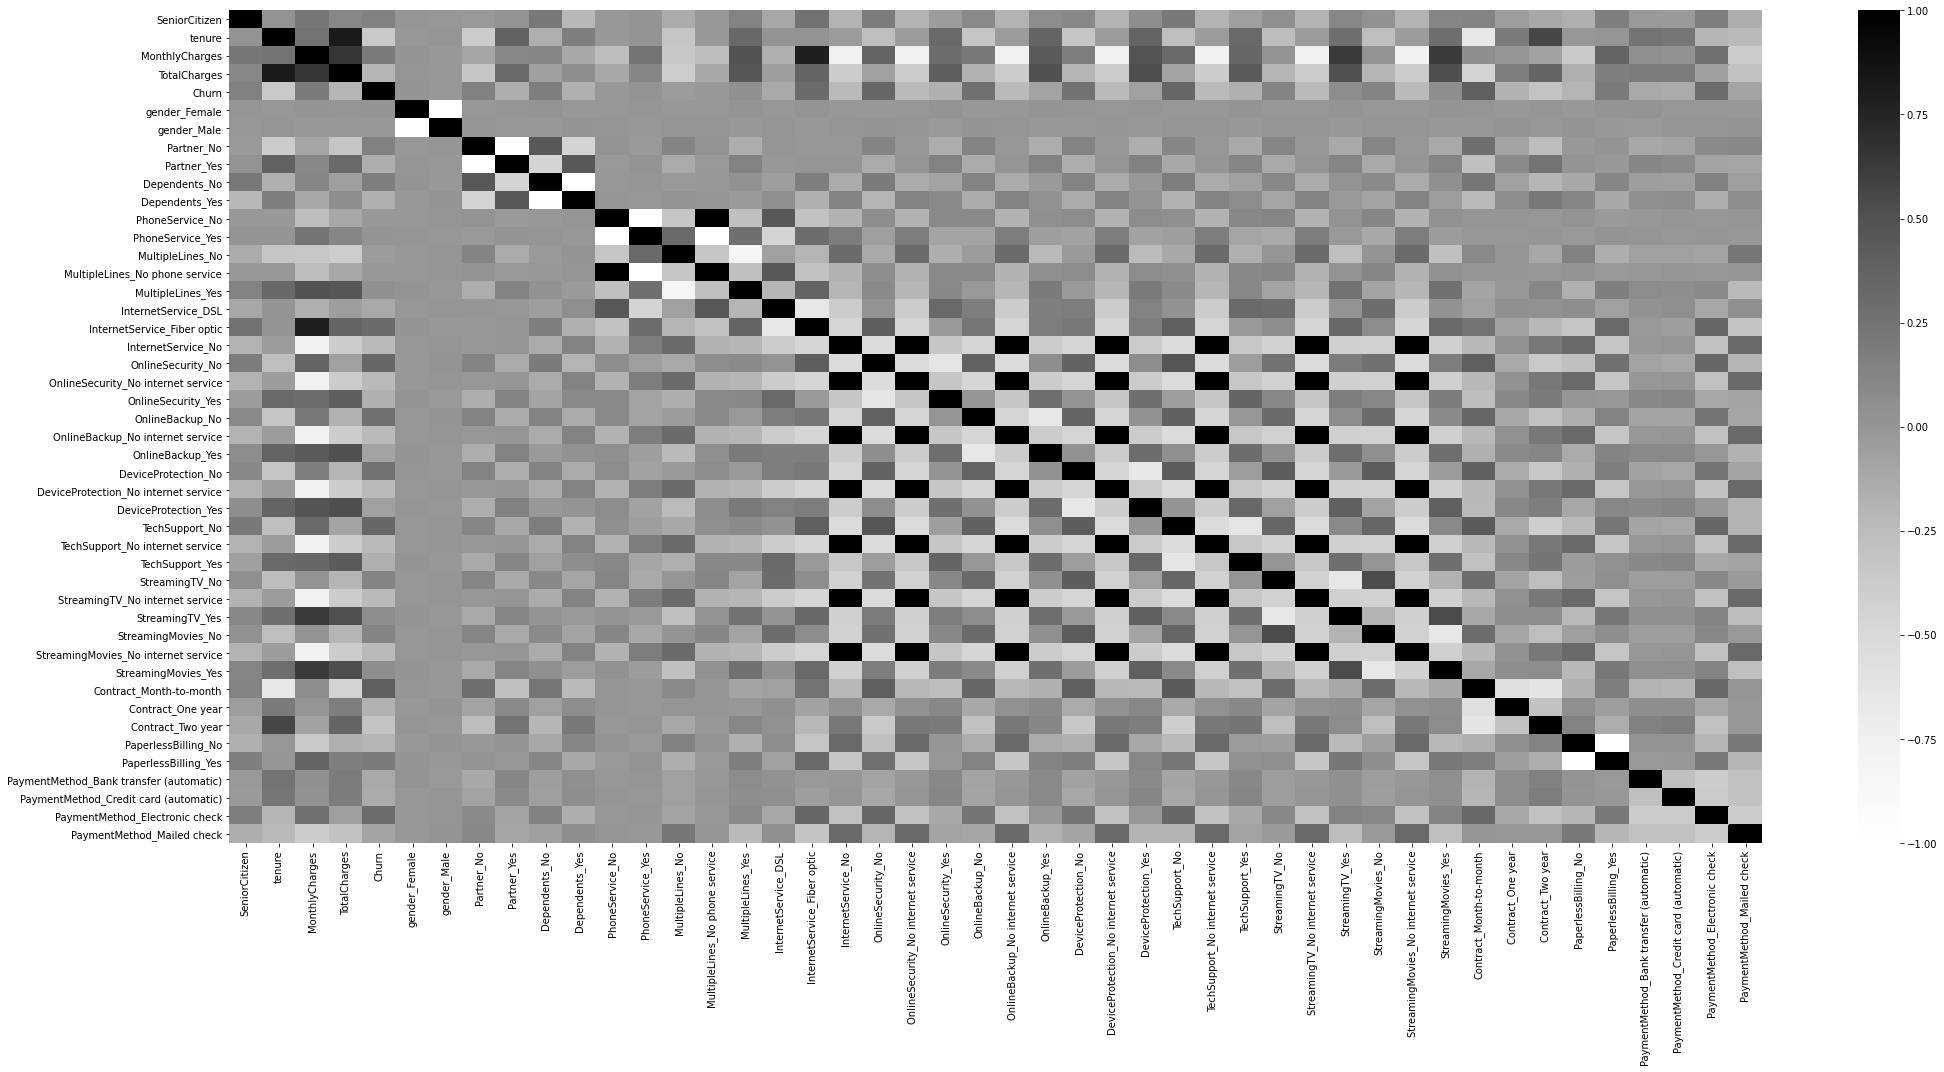

In [48]:
#plotting correlations on a heatmap
fig, ax = plt.subplots(figsize = (30,15))
sns.heatmap(telco_dummy.corr(), cmap = 'Greys')
plt.tight_layout()
plt.savefig('heatmap')

In [49]:
#categorical variables are now scaled but also need to scale the numerical variables, e.g. total changes, monthly charges
#instantiate the MinMaxScaler
scaler = MinMaxScaler()

#save columns for reassigning later
telco_dummy_columns = telco_dummy.columns

#fit the scaler to the dataframe to transform the data. Converting to dataframe as well - otherwise it would be a NumPy array
telco_dummy = pd.DataFrame(scaler.fit_transform(telco_dummy))

#reassign the column names
telco_dummy.columns = telco_dummy_columns

telco_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [50]:
#splitting the data into training, validation and test sets
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(telco_dummy, target = 'Churn', 
                                                train_size = 0.8, valid_size = 0.1, test_size = 0.1, random_state = 42)

In [51]:
#checking shape of training and testing sets - all 7043 records are there
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('Y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5634, 45)
X_valid shape: (704, 45)
X_test shape: (705, 45)
y_train shape: (5634,)
Y_valid shape: (704,)
y_test shape: (705,)


## Logistic regression

In [52]:
#fitting the model. Liblinear is and algorithim which will help optimise the results. Different solvers can be used but
#liblinear is good when the dataset is smaller
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
#predicting the churn values for X_train and X_valid
y_pred_train = logistic_model.predict(X_train)
y_pred_valid = logistic_model.predict(X_valid)

In [54]:
#evaluating the model - finding the residual differences between train data and predicted train data
residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(residuals).value_counts())

print('')

#print normalised value counts for predicted values - 80% of churn predictions were correct on the train data set
print(pd.Series(residuals).value_counts(normalize = True))

0.0    4513
1.0    1121
Name: Churn, dtype: int64

0.0    0.801029
1.0    0.198971
Name: Churn, dtype: float64


In [55]:
#evaluating the model for the test data - finding the residual differences between test data and predicted test data
residuals_test = np.abs(y_valid - y_pred_valid)

#print value counts of predicted values
print(pd.Series(residuals_test).value_counts())

print('')

#print normalised value counts for predicted values - 81% of churn predictions were correct on the validation data set
print(pd.Series(residuals_test).value_counts(normalize = True))

0.0    569
1.0    135
Name: Churn, dtype: int64

0.0    0.808239
1.0    0.191761
Name: Churn, dtype: float64


In [56]:
#definitions
#precision - how precise the predictions are or TP / (TP + FP). (Out of the times the model said the customer would churn, how
#many times did they actually churn)

#recall - what percentage of the class we're interested in were captured by the model or TP / (TP + FN). (Out of all the 
#customers that churned, what percentage did the model predict as 'going to churn')

#accuracy - measures what percentage of predictions the model got right or (TP + TN) / (TP + FP + TN + FN). 

#F1 score - harmonic mean of precision and recall - can't have a high F1 score without a strong model underneath. 
#F1 = 2(precision * recall) / (precision + recall)
#F1 score penalises model heavily if it's skewed towards precison or recall

In [57]:
#printing the confusion matrix - we are trying to limit false negatives (i.e. when we predict a customer will not churn
#but they do). When trying to limit false negatives we want to optimise on recall rather than precision

#108 = true positive, 461 = true negative, 79 = false negative, 56 = false positive
lr_matrix = confusion_matrix(y_valid, y_pred_valid)
print('Confusion matrix \n', lr_matrix)

Confusion matrix 
 [[461  56]
 [ 79 108]]


In [59]:
#visualising the confusion matrix with labels. For some reason the crosstab didn't produce the correct numbers when I 
#converted both the actual and predicted data to series dataframe. It only worked correctly when the predictions were 
#converted into an array

y_valid_df = pd.Series(y_valid)
y_pred_valid_lr = np.array(y_pred_valid)

pd.crosstab(y_valid_df, y_pred_valid_lr, margins = True, rownames = ['Actual'], colnames = ['Prediction']).reset_index()

Prediction,Actual,0.0,1.0,All
0,0,461,56,517
1,1,79,108,187
2,All,540,164,704


In [65]:
#concatenating the series into a dataframe and adding a new row to describe what the result is in each. The function uses
#if statements to define the result

#need to reset index in y_valid_df for the concat to work properly and also convert the predictions into a dataframe
y_valid_df = y_valid_df.reset_index(drop = True)
y_pred_valid_df = pd.Series(y_pred_valid)

results = pd.concat([y_valid_df, y_pred_valid_df], axis = 1).rename(columns = {'Churn': 'actual', 0: 'prediction'})

def regression_results(row):
    if row['actual'] == 1 and row['prediction'] == 1:
        return 'actual = churn and prediction = churn - True positive'
    if row['actual'] == 0 and row['prediction'] == 0:
        return 'actual = no churn and prediction =  no churn - True negative'
    if row['actual'] == 0 and row['prediction'] == 1:
        return 'actual = no churn but prediction = churn - False positive'
    if row['actual'] == 1 and row['prediction'] == 0:
        return 'actual = churn but prediction = no churn - False negative'

#applying the above function to a new row    
results['result'] = results.apply(lambda row: regression_results(row), axis = 1)

In [66]:
#grouping the results to compare with the confustion matrix
results_grouped = results.groupby('result').size()
results_grouped

result
actual = churn and prediction = churn - True positive           108
actual = churn but prediction = no churn - False negative        79
actual = no churn and prediction =  no churn - True negative    461
actual = no churn but prediction = churn - False positive        56
dtype: int64

In [69]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and y_pred_test
print(metrics.classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       517
         1.0       0.66      0.58      0.62       187

    accuracy                           0.81       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.80      0.81      0.80       704



In [70]:
#another way to print the scores, pos_label tells sklearn what class you want to print - we want 1 as that's the 'will 
#churn' class

precision_train = precision_score(y_train, y_pred_train, pos_label = 1)
precision_valid = precision_score(y_valid, y_pred_valid, pos_label = 1)

recall_train = recall_score(y_train, y_pred_train, pos_label = 1)
recall_valid = recall_score(y_valid, y_pred_valid, pos_label = 1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

f1_train = f1_score(y_train, y_pred_train, pos_label = 1)
f1_valid = f1_score(y_valid, y_pred_valid, pos_label = 1)

print('Precision train: ', round(precision_train, 2))
print('Precision valid: ', round(precision_valid, 2))
print('')
print('Recall train: ', round(recall_train, 2))
print('Recall valid: ', round(recall_valid, 2))
print('')
print('Accuracy train: ', round(accuracy_train, 2))
print('Accuracy valid: ', round(accuracy_valid, 2))
print('')
print('F1 train: ', round(f1_train, 2))
print('F1 valid: ', round(f1_valid, 2))
print('')

Precision train:  0.65
Precision valid:  0.66

Recall train:  0.54
Recall valid:  0.58

Accuracy train:  0.8
Accuracy valid:  0.81

F1 train:  0.59
F1 valid:  0.62



In [71]:
#calculating probabilities scores for test and train sets
prob_train = logistic_model.predict_proba(X_train)
prob_valid = logistic_model.predict_proba(X_valid)

#keeping probabilities for positive outcome only (the threshold is 0.5 which means, if the predicted probability of the 
#class for an instance is less than 0.5, that instance is predicted to be in class 0 (the negative class). If the 
#probability of the class for an instance is equal or greater than 0.5, the instance is classified as class 1.)
prob_train_churn = prob_train[:, 1]
prob_valid_churn = prob_valid[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for train set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob_train_churn)

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for test set
valid_fpr, valid_tpr, valid_thresholds = roc_curve(y_valid, prob_valid_churn)

In [72]:
#calculating AUC (Area Under Curve) - this gives a single numeric metric to evaluate the model. An AUC value of 1 would 
#represent a perfect classifier. If AUC = 0.5 the classifier only has 50% preision. AUC scores above 0.8 so pretty good.

auc_train = auc(train_fpr, train_tpr)
auc_valid = auc(valid_fpr, valid_tpr)
print('Training AUC: ', round(auc_train, 2))
print('Validation AUC: ', round(auc_valid, 2))

Training AUC:  0.84
Validation AUC:  0.85


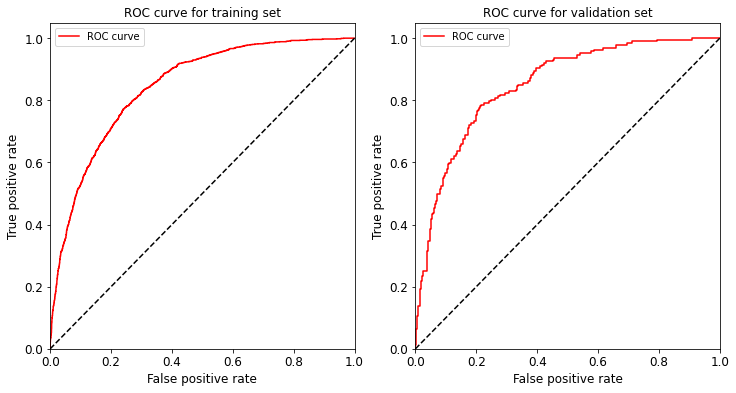

In [73]:
#plotting an ROC (Receiver Operator Characteristic) curve to evaluate the model performance visually. It illustrates the
#true positive rate against the false positive rate of our classifier. Best performing models will have an ROC curve that 
#hugs the upper left corner of the graph. This would represent that we correctly classify the positives much more often 
#than we incorrectly classify them. 

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 2, 1)
plt.plot(train_fpr, train_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for training set', fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.plot(valid_fpr, valid_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for validation set', fontsize = 12)
plt.savefig('ROC_curves')

## Random forest

1 trees
Accuracy:  0.72790202342918

2 trees
Accuracy:  0.7287894923677671

3 trees
Accuracy:  0.7312744053958111

4 trees
Accuracy:  0.7326943556975506

5 trees
Accuracy:  0.7380191693290735

15 trees
Accuracy:  0.760915867944622

20 trees
Accuracy:  0.762158324458644

25 trees
Accuracy:  0.7692580759673412

40 trees
Accuracy:  0.776180333688321

50 trees
Accuracy:  0.7776002839900603

70 trees
Accuracy:  0.7802626908058218

100 trees
Accuracy:  0.7777777777777778



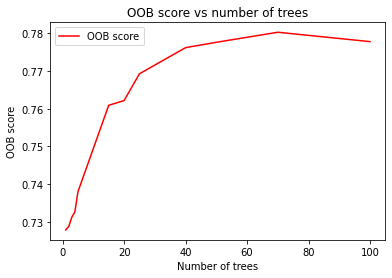

In [74]:
#putting the data through a random forest classifier model to see if that improves the results. Generally, more trees in
#the model are better so the below code will test the model with varying number of trees

#the oob score is a measure of accuracy

oob_results = []
n_estimators = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimators:
    random_model = RandomForestClassifier(trees, oob_score = True, random_state = 42)
    random_model.fit(X_train, y_train)
    print(trees, 'trees')
    accuracy = random_model.oob_score_
    print('Accuracy: ', accuracy)
    oob_results.append(accuracy)
    print('')

#plotting the oob scores on a chart. The highest accuracy is at 70 trees so will use that in the model
plt.plot(n_estimators, oob_results, color = 'red', label = 'OOB score')
plt.xlabel('Number of trees')
plt.ylabel('OOB score')
plt.title('OOB score vs number of trees')
plt.legend()

In [75]:
#fitting the model with 70 tress
random_model = RandomForestClassifier(n_estimators = 70, random_state = 42)
random_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [76]:
#predicting the churn values for X_train and X_valid
y_pred_train = random_model.predict(X_train)
y_pred_valid = random_model.predict(X_valid)

In [77]:
#evaluating the model - finding the residual differences between train data and predicted train data
random_residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(random_residuals).value_counts())

print('')

#print normalised value counts for predicted values - 99% of churn predictions were correct on the train data set
print(pd.Series(random_residuals).value_counts(normalize = True))

0.0    5624
1.0      10
Name: Churn, dtype: int64

0.0    0.998225
1.0    0.001775
Name: Churn, dtype: float64


In [78]:
#evaluating the model for the test data - finding the residual differences between validation data and predicted validation
#data
random_residuals_valid = np.abs(y_valid - y_pred_valid)

#print value counts of predicted values
print(pd.Series(random_residuals_valid).value_counts())

print('')

#print normalised value counts for predicted values - 78% of churn predictions were correct on the validation data set 
#compared to 81% with the logistic regression model
print(pd.Series(random_residuals_valid).value_counts(normalize = True))

0.0    551
1.0    153
Name: Churn, dtype: int64

0.0    0.78267
1.0    0.21733
Name: Churn, dtype: float64


In [79]:
#printing the confusion matrix 

#81 = true positive, 470 = true negative, 106 = false negative, 47 = false positive
#the random forest model gives more false negatives compared to the logistic regression model which gave 151
random_matrix = confusion_matrix(y_valid, y_pred_valid)
print('Confusion matrix \n', random_matrix)

Confusion matrix 
 [[470  47]
 [106  81]]


In [80]:
#printing out the scores for precision, recall, accuracy and F1 for y_valid and y_pred_valid - recall (which we are trying to 
#optimise is only 0.43 when predicting churn compared to 0.58 in the logistic regression model)
print(metrics.classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       517
         1.0       0.63      0.43      0.51       187

    accuracy                           0.78       704
   macro avg       0.72      0.67      0.69       704
weighted avg       0.77      0.78      0.77       704



In [84]:
#checking feature importance in the model - total charges and tenure had the most weight
feature_importance = pd.Series(random_model.feature_importances_, index = X_train.columns)
feature_importance.sort_values(ascending = False, inplace = True)
print(feature_importance)

TotalCharges                               0.165749
tenure                                     0.140739
MonthlyCharges                             0.137544
Contract_Month-to-month                    0.043832
OnlineSecurity_No                          0.033858
PaymentMethod_Electronic check             0.032320
InternetService_Fiber optic                0.026948
TechSupport_No                             0.024542
SeniorCitizen                              0.019403
gender_Male                                0.018583
Contract_Two year                          0.018358
OnlineBackup_No                            0.018308
gender_Female                              0.017902
PaperlessBilling_No                        0.016041
Partner_Yes                                0.015140
Partner_No                                 0.015054
PaperlessBilling_Yes                       0.014824
MultipleLines_No                           0.013329
OnlineBackup_Yes                           0.013261
DeviceProtec

## Random forest with hyperparameter tuning

In [85]:
#trying randomized grid search to improve random forest results
#first define the variables that will be tuned

#number of trees
n_estimators = [50, 75, 100, 200, 300, 400, 500, 600, 700]

#max number of features to consider at each split
max_features = ['auto', 'sqrt']

#max number of levels in the tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth.append(None)

#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]

#method of selecting samples for training each tree
bootstrap = [True, False]

In [87]:
#will use RandomizedSearchCV to evaluate each model. First need to set up a dictionary of the hyperparameter values
grid_params = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [88]:
#adding a start time as the following code will take a while to run
start_time = time.time()

In [89]:
#RandomizedSearchCV will take the model object, the defined hyperparameters, the number of random models to evaluate and the number of folds for 
#cross validation. On each iteration the algorithm will choose a different combination of features

#This code took around 2.5 minutes to run

tuned_rf = RandomForestClassifier(random_state = 1)
tuned_model = RandomizedSearchCV(estimator = tuned_rf, param_distributions = grid_params, n_iter = 10, cv = 5, 
                                verbose = 2, random_state = 42, n_jobs = -1)
#fit the model
tuned_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=15, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=40

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 75, 100, 200, 300,
                                                         400, 500, 600, 700]},
                   random_state=42, verbose=2)

In [90]:
#calcualting the end time
print('%s seconds ' % round((time.time() - start_time), 2))

157.36 seconds 


In [91]:
#check what the best parameters are
tuned_model.best_params_

{'n_estimators': 75,
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [92]:
#define the model and fit data to the best model
best_rf = RandomForestClassifier(n_estimators = 75, min_samples_split = 5, min_samples_leaf = 15, max_features = 'sqrt', 
                                 max_depth = 30, bootstrap = False, random_state = 42)

#fit the model
best_model = best_rf.fit(X_train, y_train)

#predictions
best_preds = best_model.predict(X_valid)

In [93]:
#printing the confusion matrix - the best model only reduced false positives by 2

#true negative = 473, true positive = 95, false negative = 92, false positive = 44
best_rf_matrix = confusion_matrix(y_valid, best_preds)
print('Confusion matrix \n', best_rf_matrix)

Confusion matrix 
 [[473  44]
 [ 92  95]]


In [94]:
#printing the scores for precision, recall, accuracy and F1 for y_valid and best_preds
#score for recall is slightly improved
print(metrics.classification_report(y_valid, best_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       517
         1.0       0.68      0.51      0.58       187

    accuracy                           0.81       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.80      0.81      0.80       704



In [95]:
#calculating probability scores to feed into ROC curve
prob_best_valid = best_model.predict_proba(X_valid)

#keeping probabilities for positive outcome only (i.e. probability greater than 0.5 or class = 1)
prob_best_valid_pos = prob_best_valid[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds
best_valid_fpr, best_valid_tpr, best_valid_thresholds = roc_curve(y_valid, prob_best_valid_pos)

In [96]:
#calculating the AUC

best_rf_auc = auc(best_valid_fpr, best_valid_tpr)
print('AUC with best random forest: ', round(best_rf_auc, 5))

AUC with best random forest:  0.85668


Text(0, 0.5, 'True positive rate')

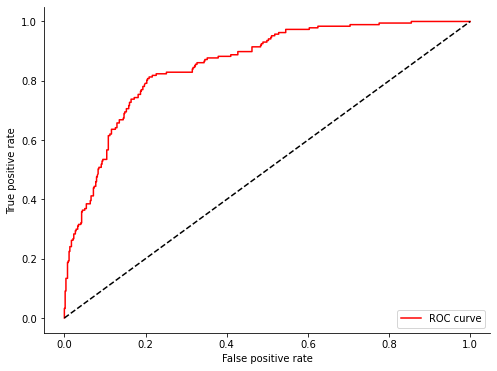

In [98]:
#plotting an ROC curve

fig = plt.figure(figsize = (8, 6))
ax = plt.subplot()
plt.plot(best_valid_fpr, best_valid_tpr, label = 'ROC curve', color = 'red')

#plotting the diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [99]:
#checking feature importance in the best model
feature_importance_best = pd.Series(best_model.feature_importances_, index = X_train.columns)
feature_importance_best.sort_values(ascending = False, inplace = True)
print(feature_importance_best)

tenure                                     0.151661
Contract_Month-to-month                    0.123413
TotalCharges                               0.110173
OnlineSecurity_No                          0.085095
InternetService_Fiber optic                0.069116
MonthlyCharges                             0.058795
PaymentMethod_Electronic check             0.055114
TechSupport_No                             0.052714
Contract_Two year                          0.043471
OnlineBackup_No                            0.021347
InternetService_DSL                        0.018202
Contract_One year                          0.017736
TechSupport_Yes                            0.015492
OnlineSecurity_Yes                         0.015287
PaperlessBilling_No                        0.011552
PaperlessBilling_Yes                       0.010122
DeviceProtection_No                        0.009528
StreamingMovies_No internet service        0.009058
TechSupport_No internet service            0.007334
StreamingMov

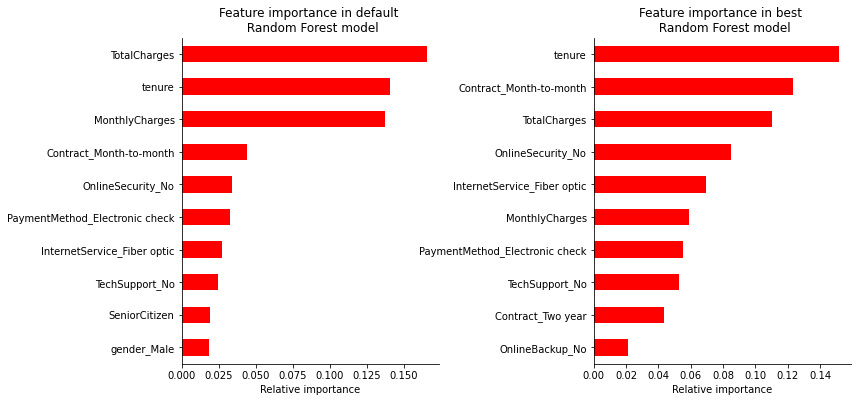

In [100]:
#plotting feature importance for both random forest models - only including top 10 features
plt.figure(figsize = (12, 6))

ax = plt.subplot(1, 2, 1)
feature_importance.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Relative importance')
plt.title('Feature importance in default \n Random Forest model')

ax = plt.subplot(1, 2, 2)
feature_importance_best.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Relative importance')
plt.title('Feature importance in best \n Random Forest model')

plt.subplots_adjust(wspace = 0.6)

## Comparing results

In [132]:
#will draw out the confusion matrices - first get the data labels for all three models

#logistic regression
titles_1 = ['True negative', 'False positive', 'False negative', 'True positive']
counts_1 = ['{:,}'.format(value) for value in lr_matrix.flatten()] #flatten puts the array values into one row
percentages_1 = ['{0:.2%}'.format(value) for value in lr_matrix.flatten() / np.sum(lr_matrix)]
#the below attaches the above information together - \n means new line
labels_1 = [f'{a} \n {b} \n {c}' for a, b, c, in zip(titles_1, counts_1, percentages_1)]
#converting the above into an array
labels_1 = np.asarray(labels_1).reshape(2, 2)

#first random forest
titles_2 = ['True negative', 'False positive', 'False negative', 'True positive']
counts_2 = ['{:,}'.format(value) for value in random_matrix.flatten()]
percentages_2 = ['{0:.2%}'.format(value) for value in random_matrix.flatten() / np.sum(random_matrix)]
labels_2 = [f'{a} \n {b} \n {c}' for a, b, c, in zip(titles_2, counts_2, percentages_2)]
labels_2 = np.asarray(labels_2).reshape(2, 2)

#default logistic regression
titles_3 = ['True negative', 'False positive', 'False negative', 'True positive']
counts_3 = ['{:,}'.format(value) for value in best_rf_matrix.flatten()]
percentages_3 = ['{0:.2%}'.format(value) for value in best_rf_matrix.flatten() / np.sum(best_rf_matrix)]
labels_3 = [f'{a} \n {b} \n {c}' for a, b, c, in zip(titles_3, counts_3, percentages_3)]
labels_3 = np.asarray(labels_3).reshape(2, 2)

SyntaxError: invalid syntax (<ipython-input-132-49daeec86e3b>, line 8)

In [122]:
#stats to display below each matrix

#logistic regression
#np.trace() sums the diagonals of the matrix from left to right
accuracy_1 = np.trace(lr_matrix) / np.sum(lr_matrix)
#[1, 1] is the bottom right corner - true positives, [:, 1] is the right column - all positives
precision_1 = lr_matrix[1, 1] / sum(lr_matrix[:, 1])
#[1, :] is the bottom row - false negatives plus true positives
recall_1 = lr_matrix[1, 1] / sum(lr_matrix [1, :])
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
text_1 = '\n Accuracy = {:0.3f} \n Precision = {:0.3f} \n Recall = {:0.3f} \n F1 score = {:0.3f}'.format(accuracy_1, precision_1, recall_1, f1_score_1)

#first random forest
accuracy_2 = np.trace(random_matrix) / np.sum(random_matrix)
precision_2 = random_matrix[1, 1] / sum(random_matrix[:, 1])
recall_2 = random_matrix[1, 1] / sum(random_matrix [1, :])
f1_score_2 = 2 * precision_2 * recall_2 / (precision_2 + recall_2)
text_2 = '\n Accuracy = {:0.3f} \n Precision = {:0.3f} \n Recall = {:0.3f} \n F1 score = {:0.3f}'.format(accuracy_2, precision_2, recall_2, f1_score_2)

#default logistic regression
accuracy_3 = np.trace(best_rf_matrix) / np.sum(best_rf_matrix)
precision_3 = best_rf_matrix[1, 1] / sum(best_rf_matrix[:, 1])
recall_3 = best_rf_matrix[1, 1] / sum(best_rf_matrix [1, :])
f1_score_3 = 2 * precision_3 * recall_3 / (precision_3 + recall_3)
text_3 = '\n Accuracy = {:0.3f} \n Precision = {:0.3f} \n Recall = {:0.3f} \n F1 score = {:0.3f}'.format(accuracy_3, precision_3, recall_3, f1_score_3)

Text(0.5, 15.0, '\n Accuracy = 0.807 \n Precision = 0.683 \n Recall = 0.508 \n F1 score = 0.583')

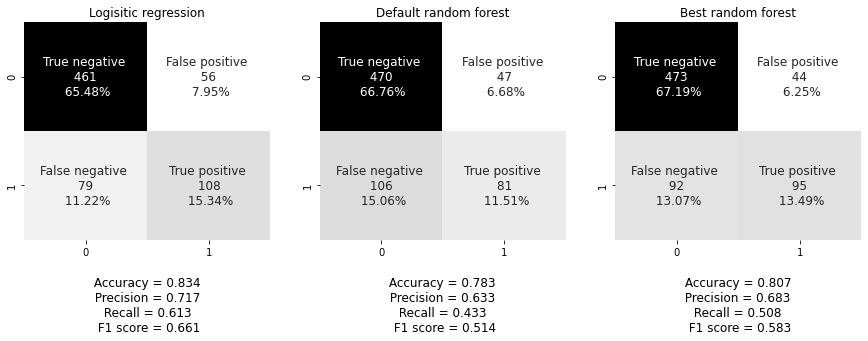

In [151]:
#creating the matrices
fig = plt.figure(figsize = (15, 4))

#logistic regression
ax = plt.subplot(1, 3, 1)
#fmt allows for string annotations on the heat map - annot only allows for numerical 
sns.heatmap(lr_matrix, annot = labels_1, annot_kws = {'fontsize': 12}, fmt = '', cmap = 'binary', cbar = False)
ax.set_title('Logisitic regression', fontsize = 12)       
ax.set_xlabel(text_1, fontsize = 12)   

#first random forest
ax = plt.subplot(1, 3, 2)
sns.heatmap(random_matrix, annot = labels_2, annot_kws = {'fontsize': 12}, fmt = '', cmap = 'binary', cbar = False)
ax.set_title('Default random forest', fontsize = 12)       
ax.set_xlabel(text_2, fontsize = 12) 

#best random forest
ax = plt.subplot(1, 3, 3)
sns.heatmap(best_rf_matrix, annot = labels_3, annot_kws = {'fontsize': 12}, fmt = '', cmap = 'binary', cbar = False)
ax.set_title('Best random forest', fontsize = 12)       
ax.set_xlabel(text_3, fontsize = 12)

## Final model results on test data

In [140]:
#the logistic regression performed best at reducing recall - will use this to predict values for the test data
test_preds = logistic_model.predict(X_test)

In [141]:
#printing the confusion matrix

#true negative = 474, true positive = 114, false negative = 72, false positive = 45
test_lr_matrix = confusion_matrix(y_test, test_preds)
print('Confusion matrix \n', test_lr_matrix)

Confusion matrix 
 [[474  45]
 [ 72 114]]


In [142]:
#printing the scores for precision, recall, accuracy and F1 for y_test and test_preds
#score for precision is higher for test data at 0.61 - on validation data it was 0.58 
print(metrics.classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       519
         1.0       0.72      0.61      0.66       186

    accuracy                           0.83       705
   macro avg       0.79      0.76      0.78       705
weighted avg       0.83      0.83      0.83       705



In [143]:
#calculating probability scores to feed into ROC curve
prob_test = logistic_model.predict_proba(X_test)

#keeping probabilities for positive outcome only (i.e. probability greater than 0.5 or class = 1)
prob_test_pos = prob_test[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, prob_test_pos)

In [144]:
#calculating the AUC - very little difference between test and validation data although test score is slightly better

test_auc = auc(test_fpr, test_tpr)
print('AUC with logistic regression on validation data: ', round(auc_valid, 5))
print('AUC with logistic regression on test data: ', round(test_auc, 5))

AUC with logistic regression on validation data:  0.84954
AUC with logistic regression on test data:  0.87377


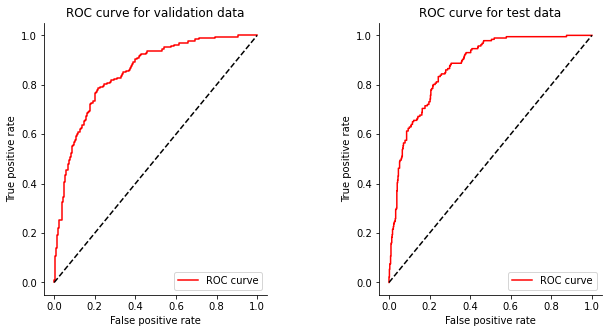

In [146]:
#plotting an ROC curve for validation and test data

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(valid_fpr, valid_tpr, label = 'ROC curve', color = 'red')

#plotting the diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for validation data')

ax = plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, label = 'ROC curve', color = 'red')

#plotting the diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for test data')

plt.subplots_adjust(wspace = 0.5)
plt.savefig('ROC curves')

In [147]:
#plotting the confusion matrices - first getting the data

#best random forest labels - validation data
titles_val = ['True negative', 'False positive', 'False negative', 'True positive']
counts_val = ['{:,}'.format(value) for value in lr_matrix.flatten()]
percentages_val = ['{0:.2%}'.format(value) for value in lr_matrix.flatten() / np.sum(lr_matrix)]
labels_val = [f'{a} \n {b} \n {c}' for a, b, c, in zip(titles_val, counts_val, percentages_val)]
labels_val = np.asarray(labels_val).reshape(2, 2)

#best random forest labels - test data
titles_test = ['True negative', 'False positive', 'False negative', 'True positive']
counts_test = ['{:,}'.format(value) for value in test_lr_matrix.flatten()]
percentages_test = ['{0:.2%}'.format(value) for value in test_lr_matrix.flatten() / np.sum(test_lr_matrix)]
labels_test = [f'{a} \n {b} \n {c}' for a, b, c, in zip(titles_test, counts_test, percentages_test)]
labels_test = np.asarray(labels_test).reshape(2, 2)

In [148]:
#stats to display below each matrix

#validation data
accuracy_1 = np.trace(lr_matrix) / np.sum(lr_matrix)
precision_1 = lr_matrix[1, 1] / sum(lr_matrix[:, 1])
recall_1 = lr_matrix[1, 1] / sum(lr_matrix [1, :])
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
text_1 = '\n Accuracy = {:0.3f} \n Precision = {:0.3f} \n Recall = {:0.3f} \n F1 score = {:0.3f}'.format(accuracy_1, precision_1, recall_1, f1_score_1)

#test data
accuracy_1 = np.trace(test_lr_matrix) / np.sum(test_lr_matrix)
precision_1 = test_lr_matrix[1, 1] / sum(test_lr_matrix[:, 1])
recall_1 = test_lr_matrix[1, 1] / sum(test_lr_matrix [1, :])
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
text_1 = '\n Accuracy = {:0.3f} \n Precision = {:0.3f} \n Recall = {:0.3f} \n F1 score = {:0.3f}'.format(accuracy_1, precision_1, recall_1, f1_score_1)

Text(0.5, 15.0, '\n Accuracy = 0.834 \n Precision = 0.717 \n Recall = 0.613 \n F1 score = 0.661')

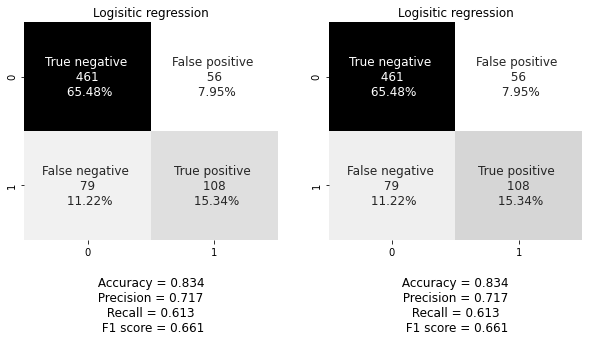

In [150]:
#creating the matrices
fig = plt.figure(figsize = (10, 4))

#validation data
ax = plt.subplot(1, 2, 1)
sns.heatmap(lr_matrix, annot = labels_1, annot_kws = {'fontsize': 12}, fmt = '', cmap = 'binary', cbar = False)
ax.set_title('Logisitic regression', fontsize = 12)       
ax.set_xlabel(text_1, fontsize = 12)   

#test data
ax = plt.subplot(1, 2, 2)
sns.heatmap(test_lr_matrix, annot = labels_1, annot_kws = {'fontsize': 12}, fmt = '', cmap = 'binary', cbar = False)
ax.set_title('Logisitic regression', fontsize = 12)       
ax.set_xlabel(text_1, fontsize = 12)   